In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
print("TensorFlow Version:", tf.__version__)

RANDOM_SEED = 42


TensorFlow Version: 2.15.0


# 各パス指定

In [2]:
dataset = "C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint.csv"
model_save_path = "C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint_classifier.keras"

# 分類数設定

In [3]:
NUM_CLASSES = 24

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

model =  tf.keras.models.Sequential([
     tf.keras.layers.Input((21 * 2, )),
    
    # First dense layer with batch normalization and dropout
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Second dense layer with batch normalization and dropout
     tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Third dense layer with batch normalization and dropout
     tf.keras.layers.Dense(20, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Output layer
     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4300      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                       

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


17/22 [======================>.......] - ETA: 0s - loss: 3.2451 - accuracy: 0.0740
Epoch 1: saving model to C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier\keypoint_classifier.keras
22/22 [==============================] - 6s 46ms/step - loss: 3.2028 - accuracy: 0.0799 - val_loss: 3.1145 - val_accuracy: 0.1301
Epoch 2/1000
18/22 [=======================>......] - ETA: 0s - loss: 2.8627 - accuracy: 0.1541
Epoch 2: saving model to C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier\keypoint_classifier.keras
22/22 [==============================] - 0s 14ms/step - loss: 2.8391 - accuracy: 0.1583 - val_loss: 3.0846 - val_accuracy: 0.1913
Epoch 3/1000
19/22 [========================>.....] - ETA: 0s - loss: 2.6363 - accuracy: 0.2282
Epoch 3: saving model to C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.8448


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 320ms/step
[9.98598278e-01 5.71058517e-05 8.35332088e-04 1.23307755e-05
 3.44890793e-07 6.86334317e-07 1.91118517e-07 1.19649471e-07
 1.11285881e-05 3.43161241e-06 1.21833991e-05 1.33797103e-05
 6.85788621e-07 6.94278484e-08 1.13811157e-05 2.11559495e-06
 5.80458982e-06 1.09114939e-04 1.30552571e-05 2.06603158e-06
 1.68891756e-06 1.20452787e-04 1.87911384e-04 1.15102910e-06]
0


# 混同行列

29/29 [==============================] - 0s 3ms/step


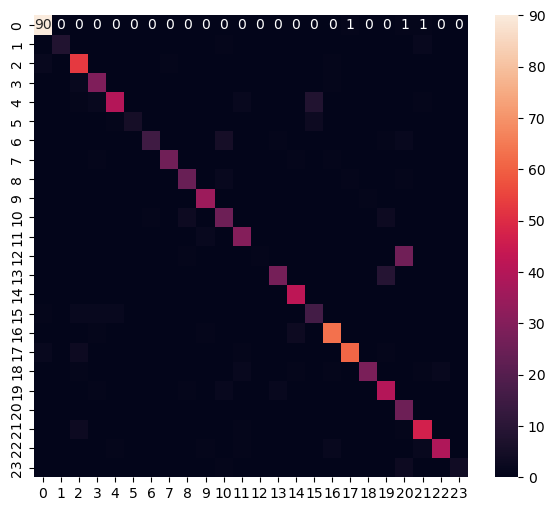

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        93
           1       1.00      0.73      0.84        11
           2       0.82      0.93      0.87        57
           3       0.81      0.91      0.85        32
           4       0.91      0.74      0.82        54
           5       1.00      0.56      0.71         9
           6       0.94      0.62      0.75        24
           7       0.96      0.90      0.93        29
           8       0.83      0.86      0.84        28
           9       0.90      0.97      0.93        36
          10       0.69      0.78      0.74        32
          11       0.81      0.94      0.87        32
          12       1.00      0.04      0.07        28
          13       0.90      0.75      0.82        36
          14       0.89      1.00      0.94        42
          15       0.59      0.70      0.64        23
          16       0.91      0.93      0.92        68
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model_save_path2 = "C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint_classifier.keras"
model.save(model_save_path2)
# print(tf.keras.__version__)

In [17]:
# モデルを変換(量子化)
tflite_save_path = "C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint_classifier.tflite"

new_model= tf.keras.models.load_model(filepath=model_save_path2)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)


INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmpxlp0n5ke\assets


INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmpxlp0n5ke\assets


21688

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path='model/keypoint_classifier/keypoint_classifier.tflite')
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3092352e-05 5.6203740e-04 1.6251431e-03 3.5287360e-06 1.2288676e-04
 9.7136003e-01 2.3023365e-06 1.5500954e-06 6.3160053e-03 4.9398994e-05
 1.1735849e-04 3.2195469e-05 6.6606114e-03 6.3226622e-04 1.0860221e-06
 3.8634089e-03 5.5329024e-04 5.8086107e-06 1.4404940e-05 3.3081573e-04
 7.1336669e-03 4.7222007e-04 4.5454271e-07 1.2640390e-04]
5
